# EDA JKT48 Member

Notebook ini bertujuan untuk melakukan eksplorasi pada data dari [JKT48 Table](https://www.kaggle.com/xpajonx/jkt48-table?select=JKT48_frame_2020.xlsx)

*Masih perlu banyak perbaikan ~ cmglonly a.k.a @theDreamer911*

## Menambahkan Modules

In [1]:
# Menginstall package supaya dapat memproses file dataset ini
!pip install xlrd openpyxl

In [2]:
import matplotlib.pyplot as plt # Membuat grafik
import pandas as pd # Mengolah data
import numpy as np # Memproses data

In [3]:
# Mencari direktori lokasi penyimpanan file dataset pada kaggle
!ls /kaggle/input/jkt48-table 

JKT48_frame_2020.xlsx


In [4]:
df = pd.read_excel('/kaggle/input/jkt48-table/JKT48_frame_2020.xlsx')

/opt/conda/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
df.head() # Melihat 5 baris pertama

,Nama,Generasi,Panggilan,Tempat Lahir,Tanggal Lahir,Bergabung di JKT48,Usia Debut,Status Terakhir,Tanggal Keluar,Usia Keluar,Nama Fansclub,Perkenalan,Usia,Alasan Keluar,Waktu Aktif
0,Adriani Elisabeth,Keempat,"Lisa, Lisayang",Jakarta,2000-05-10,2015-05-16,15.0,True,NaT,NaN,Lisanshine,Aku si vitamin C yang akan memberikan vitamin ...,20.0,NaN,6
1,Amanina Afiqah Ibrahim,Kedelapan,Afiqah,Jakarta,2006-01-06,2019-04-27,13.0,True,NaT,NaN,Afiqaristic,Si gadis yang penuh energi dan akan menginspir...,15.0,NaN,2
2,Aninditha Rahma Cahyadi,Ketiga,Anin,Palembang,1999-01-05,2014-03-15,15.0,True,NaT,NaN,Aninlicious,Bagaikan angin yang akan selalu menghembuskan ...,22.0,NaN,7
3,Ariella Calista Ichwan,Keenam,"Ariel, Eril",Jakarta,2000-05-12,2018-04-08,17.0,True,NaT,NaN,Ariellice,Jangan main-main dengan pesona sanguinku! Halo...,20.0,NaN,3
4,Azizi Shafaa Asadel,Ketujuh,"Zee, Zizi",Kota Tangerang,2004-05-16,2018-09-29,14.0,True,NaT,NaN,Zeemotion,Si gadis tomboi yang semangatnya meletup-letup...,16.0,NaN,2


## Membuat Chart Jumlah Anggota Generasi

In [6]:
# Memeriksa nilai yang terdapat pada kolom generasi
df.Generasi.unique()

array(['Keempat', 'Kedelapan', 'Ketiga', 'Keenam', 'Ketujuh', 'Kelima',
       'Pertama', 'Kedua', 'Kesembilan', 'Keenam (AKB48)',
       'Ketiga (AKB48)', 'Kelima (AKB48)', 'Draf ke-1 (AKB48)',
       'Kesepuluh'], dtype=object)

In [7]:
# Menghapus hal yang tidak diperlukan (contoh: AKB48)
df_filter = df[~df['Generasi'].str.contains('AKB48')]

In [8]:
df_filter.Generasi.unique()

array(['Keempat', 'Kedelapan', 'Ketiga', 'Keenam', 'Ketujuh', 'Kelima',
       'Pertama', 'Kedua', 'Kesembilan', 'Kesepuluh'], dtype=object)

In [9]:
# Mengisikan string yang unique ke dalam list
asli = ['Keempat', 'Kedelapan', 'Ketiga', 'Keenam', 'Ketujuh', 'Kelima',
       'Pertama', 'Kedua', 'Kesembilan', 'Kesepuluh']

# Mengisikan angka yang merujuk pada string sebelumnya
ganti = [4, 8, 3, 6, 7, 5, 1, 2, 9, 10]

# Secara otomatis merubah angka menjadi format string
ganti2 = [str(i) for i in ganti]

In [10]:
# Menyimpan df_filter ke df2 untuk backup
df2 = df_filter.copy() 

In [11]:
# Mengubah nilai string menjadi angka
for idx, val in enumerate(asli):
    df2['Generasi'] = df2.Generasi.apply(lambda x: x.replace(asli[idx], ganti2[idx]))

In [12]:
df2.Generasi

0       4
1       8
2       3
3       6
4       7
       ..
195    10
196    10
197    10
198     3
199     3
Name: Generasi, Length: 196, dtype: object

Terlihat type dari data tersebut masih object, untuk itu perlu dirubah menjadi integer

In [13]:
# Mengubah tipe kolom
df2.Generasi = df2.Generasi.astype('int')

In [14]:
df2.Generasi

0       4
1       8
2       3
3       6
4       7
       ..
195    10
196    10
197    10
198     3
199     3
Name: Generasi, Length: 196, dtype: int64

Terlihat kolom telah menjadi integer

In [15]:
# Mengurutkan kolom berdasarkan nilai generasi supaya lebih mudah dilihat
df2.sort_values(by='Generasi', inplace=True)

In [16]:
df2

,Nama,Generasi,Panggilan,Tempat Lahir,Tanggal Lahir,Bergabung di JKT48,Usia Debut,Status Terakhir,Tanggal Keluar,Usia Keluar,Nama Fansclub,Perkenalan,Usia,Alasan Keluar,Waktu Aktif
112,Rezky Wiranti Dhike,1,Dhike,Kepahiang,1995-11-22,2011-11-02,15.0,False,2016-09-13,20.0,Dhikeringer,"Secerah matahari, selembut embun pagi. Aku Dhike.",25.0,Lulus,5
77,Diasta Priswarini,1,DiastaNyash,Bandung,1991-09-09,2011-11-02,20.0,False,2013-12-22,22.0,Nyasshiteru,"Aku jalani mimpi dengan ceria! Namaku, Diasta.",29.0,Lulus,2
129,Melody Nurramdhani Laksani,1,MelodyIbu GM,Bandung,1992-03-24,2011-11-02,19.0,False,2018-03-31,26.0,Melodiest,"Ceria dan bersinar selalu! Aku, Melody!",28.0,Lulus,6
123,Nabilah Ratna Ayu Azalia,1,NabilahAyu-chinJaenabKang Bajay,Jakarta,1999-11-11,2011-11-02,11.0,False,2017-10-31,17.0,Nabilaholic,"Hai, namaku Nabilah, aku si cerewet. Let's hav...",21.0,Mundur,6
121,Jessica Veranda Tanumihardja,1,VerandaVe,Jakarta,1993-08-19,2011-11-02,18.0,False,2017-05-25,23.0,Veloved,Meskipun aku pemalu tetapi aku tetap fashionab...,27.0,Lulus,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Indira Putri Seruni,10,Indira,NaN,NaT,2020-08-27,NaN,False,2020-12-04,NaN,Indiraise,Tidak ada,NaN,Dibatalkan,0
195,Jesslyn Elly,10,Lyn,NaN,NaT,2020-08-27,NaN,False,2020-12-04,NaN,Jellybean,Tidak ada,NaN,Dibatalkan,0
196,Naura Safinatunnajah,10,Naura,NaN,NaT,2020-08-27,NaN,False,2020-12-04,NaN,NASA,Tidak ada,NaN,Dibatalkan,0
197,Raisha Syifa Wardhana,10,Raisha,NaN,NaT,2020-08-27,NaN,False,2020-12-04,NaN,Raishanrise,Tidak ada,NaN,Dibatalkan,0


In [17]:
# Menghitung jumlah nilai pada Generasi yang berbeda dan mengurutkannya berdasarkan urutan index
# Menyimpan output menjadi dataframe df_gen
df_gen = df2.Generasi.value_counts().sort_index().to_frame()

In [18]:
df_gen

,Generasi
1,28
2,31
3,32
4,12
5,17
6,14
7,20
8,19
9,12
10,11


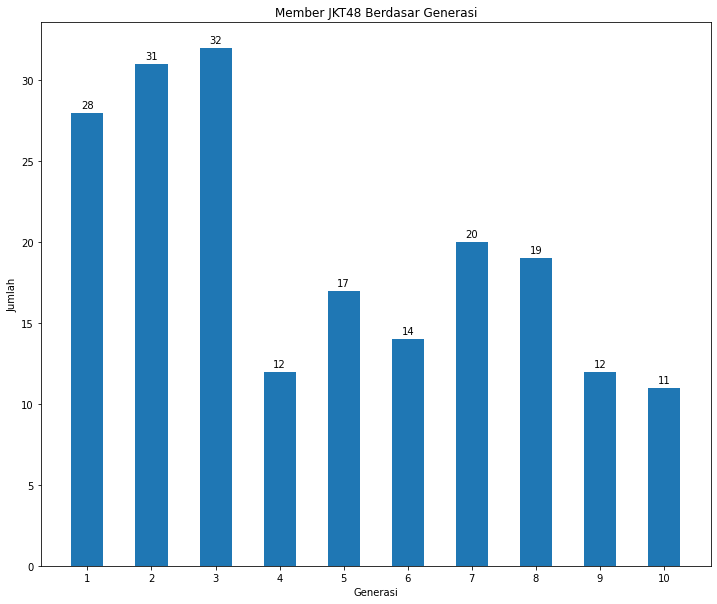

In [36]:
# Menampilkan member tiap generasi menjadi grafik
num_gen = list(df_gen.index)
sum_gen = list(df_gen.Generasi)

x = np.arange(len(num_gen))
width = 0.5

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(12)
ax.set_title("Member JKT48 Berdasar Generasi")
ax.set_xlabel("Generasi")
ax.set_ylabel("Jumlah")
ax.set_xticks(x)
ax.set_xticklabels(num_gen)

gen_frame = ax.bar(x, sum_gen, width, label='Generasi')
for gen in gen_frame:
    height = gen.get_height()
    ax.annotate("{}".format(height),
       xy=(gen.get_x() + gen.get_width() / 2, height),
       xytext=(0, 3),
       textcoords="offset points",
       ha='center', va='bottom')

plt.show()

Terlihat JKT48 memiliki anggota terbanyak pada generasi 3 yaitu 32 orang dan paling sedikit pada generasi 10 yaitu hanya 11 orang

## Membuat Chart Berdasarkan Generasi Tahun Lahir

Pembagian berdasarkan:
 * Milenial : < 2000
 * Transisi : 2000
 * Gen_Z    : > 2000

In [20]:
# Memeriksa dataframe apakah ada yang perlu diubah
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 112 to 189
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Nama                196 non-null    object        
 1   Generasi            196 non-null    int64         
 2   Panggilan           196 non-null    object        
 3   Tempat Lahir        185 non-null    object        
 4   Tanggal Lahir       185 non-null    datetime64[ns]
 5   Bergabung di JKT48  196 non-null    datetime64[ns]
 6   Usia Debut          185 non-null    float64       
 7   Status Terakhir     196 non-null    bool          
 8   Tanggal Keluar      133 non-null    datetime64[ns]
 9   Usia Keluar         122 non-null    float64       
 10  Nama Fansclub       188 non-null    object        
 11  Perkenalan          196 non-null    object        
 12  Usia                185 non-null    float64       
 13  Alasan Keluar       133 non-null    object      

Terlihat bahwa tahun lahir sudah berupa datetime64 sehingga perlu diolah apabila tidak ada data yang kosong

In [22]:
# Memeriksa jumlah dataframe tanggal lahir yang kosong
df['Tanggal Lahir'].isna().sum()

11

In [23]:
# Membackup perubahan df2 ke df3
df3 = df2.copy()

In [24]:
# Menyimpan nilai yang ada saja pada dataframe df3
df3 = df3[~df3['Tanggal Lahir'].isnull()]

In [25]:
# Memeriksa jumlah dataframe tanggal lahir yang kosong
df3['Tanggal Lahir'].isna().sum()

0

In [26]:
# Menyimpan nilai tahun lahir dari kolom 'Tanggal Lahir' ke 'Tahun Lahir'
df3['Tahun Lahir'] = pd.DatetimeIndex(df3["Tanggal Lahir"]).year

In [27]:
# Memeriksa Tahun Lahir apakah sudah ditambahkan
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 112 to 56
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Nama                185 non-null    object        
 1   Generasi            185 non-null    int64         
 2   Panggilan           185 non-null    object        
 3   Tempat Lahir        185 non-null    object        
 4   Tanggal Lahir       185 non-null    datetime64[ns]
 5   Bergabung di JKT48  185 non-null    datetime64[ns]
 6   Usia Debut          185 non-null    float64       
 7   Status Terakhir     185 non-null    bool          
 8   Tanggal Keluar      122 non-null    datetime64[ns]
 9   Usia Keluar         122 non-null    float64       
 10  Nama Fansclub       178 non-null    object        
 11  Perkenalan          185 non-null    object        
 12  Usia                185 non-null    float64       
 13  Alasan Keluar       122 non-null    object       

In [28]:
df3['Tahun Lahir']

112    1995
77     1991
129    1992
123    1999
121    1993
       ... 
62     2003
57     2006
49     2009
175    2003
56     2001
Name: Tahun Lahir, Length: 185, dtype: int64

In [29]:
# Menyimpan data Tahun Lahir ke frame baru
df_year = df3['Tahun Lahir'].to_frame()

In [30]:
df_year

,Tahun Lahir
112,1995
77,1991
129,1992
123,1999
121,1993
...,...
62,2003
57,2006
49,2009
175,2003


In [31]:
# Membagi kelas generasi berdasarkan tahun lahir
millenial = df_year[df_year['Tahun Lahir'] < 2000]
transisi = df_year[df_year['Tahun Lahir'] == 2000]
gen_z = df_year[df_year['Tahun Lahir'] > 2000]

In [32]:
# Membuat list dari data yang sudah ada
gen_names = ['millenial', 'transisi', 'gen_z']
gen_total = [len(millenial), len(transisi), len(gen_z)]

# Merubah list menjadi dataframe
df_tahun = pd.DataFrame(list(zip(gen_names, gen_total)), columns=['Generasi', 'Jumlah'])

In [33]:
df_tahun

,Generasi,Jumlah
0,millenial,96
1,transisi,24
2,gen_z,65


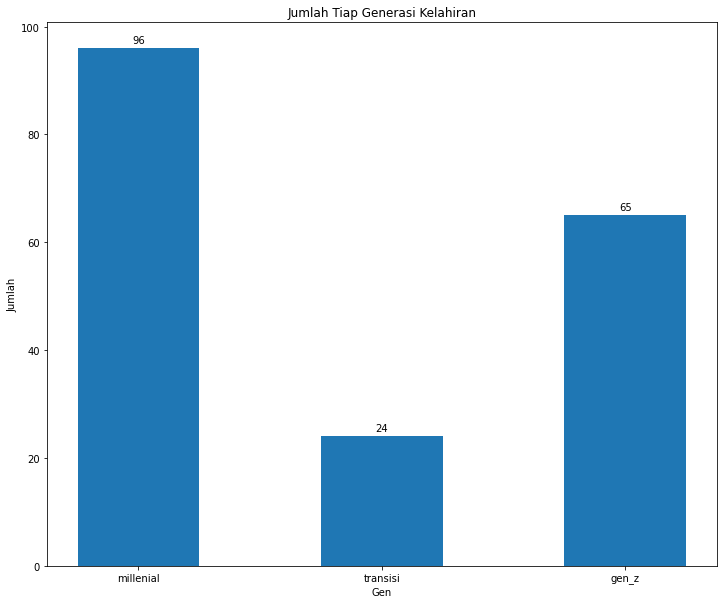

In [40]:
# Menampilkan member tiap generasi tahun lahir menjadi grafik
num_gen_2 = list(df_tahun.Generasi)
sum_gen_2 = list(df_tahun.Jumlah)

x = np.arange(len(num_gen_2))
width = 0.5

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(12)
ax.set_title("Jumlah Tiap Generasi Kelahiran")
ax.set_xlabel("Gen")
ax.set_ylabel("Jumlah")
ax.set_xticks(x)
ax.set_xticklabels(num_gen_2)

gen_frame = ax.bar(x, sum_gen_2, width)
for gen in gen_frame:
    height = gen.get_height()
    ax.annotate("{}".format(height),
       xy=(gen.get_x() + gen.get_width() / 2, height),
       xytext=(0, 3),
       textcoords="offset points",
       ha='center', va='bottom')

plt.show()

Pembagian generasi ini merupakan preferensi yang saya buat secara mandiri, hal ini karena menurut saya orang yang lahir tahun 2000 memiliki sifat transisi antara millenial dan z. Mereka memiliki kehidupan yang merasakan permaianan bersama lingkungan dan virtual secara berdekatan. 

Terlihat pada data tersebut, anggota JKT48 yang paling tinggi diduduki oleh para millenial yang lahir sebelum tahun 2000 yaitu berjumlah 96 orang, kemudian dilanjutkan orang yang lahir setelah tahun 2000 berjumlah 65 orang. Disini terlihat pula, bahwa para gen transisi, memiliki nilai yang cukup kuat diantara keduanya yaitu 24 orang.

## Penutup

Notebook ini hanya sekedar latihan belaka, tidak ada maksud untuk mengunggulkan suatu generasi maupun merendahkan generasi yang lain. Penulis berharap pembaca dapat mempraktikkan tahap serupa pada kasus yang lain. Tujuannya tentu untuk meningkatkan jumlah penggiat aktif data science Indonesia.

Dapat diaskes: [Kaggle](https://www.kaggle.com/cmglonly/eda-member-jkt48)